In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,40255,None,None,85793.009323
2020-06-13,40256,None,None,79707.508670
2020-06-14,40257,None,None,74054.964348
2020-06-15,40258,None,None,68730.742499
2020-06-16,40259,None,None,63988.600930
...,...,...,...,...
2021-03-17,40533,None,None,83028.174815
2021-03-18,40534,None,None,80394.991441
2021-03-19,40535,None,None,78258.653952


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-21_2021-03-21-17-45.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-20_2021-03-20-15-47.pickle


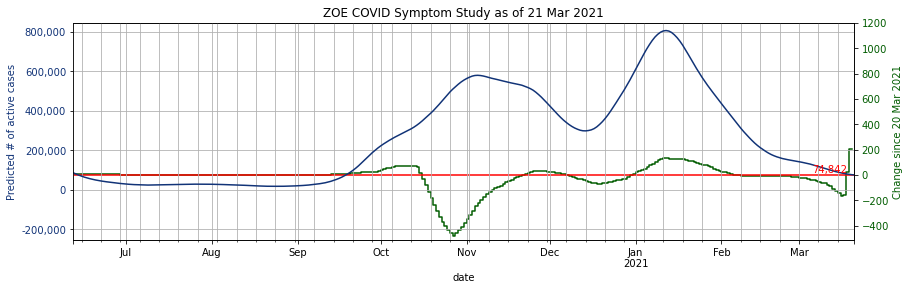

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

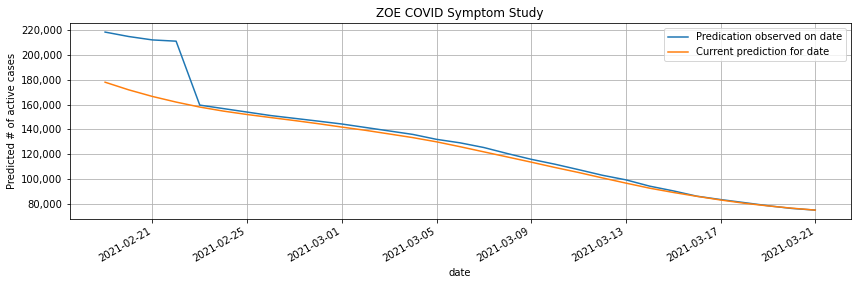

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-03-21_2021-03-21-17-45.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
328,Conwy,W06000003,1.203367
15,"Kingston upon Hull, City of",E06000010,1.189391
373,North Ayrshire,S12000021,0.692850
46,Northumberland,E06000057,0.645541
325,Glasgow City,S12000046,0.633762
306,Midlothian,S12000019,0.586060
7,Halton,E06000006,0.517185
370,Redbridge,E09000026,0.506314
127,Harlow,E07000073,0.448642
326,Isle of Anglesey,W06000001,0.437505
